<a href="https://colab.research.google.com/github/IvanRavarotto/ModelosSupervisados/blob/main/ModelosSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Predicción de Enfermedades Cardiovasculares mediante Clasificación Supervisada (DecisionTreeClassifier, Naive Bayesian, Support Vector Machines, K-Nearest Neighbor y Perceptron)

## Carga de imports y froms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.metrics import accuracy_score, confusion_matrix

## Carga Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IvanRavarotto/ModelosSupervisados_DataAnalyst/refs/heads/main/Cardiovascular_Disease_Dataset.csv')

## Carga de datos para un nuevo paciente

In [3]:
Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
Dolor_Pecho = "1"       # @param ["0", "1", "2", "3"]
Presion_Arterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
Frecuencia_Cardiaca_Maxima = 146      # @param {type:"slider", min:60, max:250, step:1}
Angina_De_Pecho = "0"            # @param ["0", "1"]
Depresion = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
Vasos_CA_fectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Se crea un DF con los datos que ingresó el usuario
datos_usuario_master = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [Dolor_Pecho],
    'restingBP': [Presion_Arterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [Frecuencia_Cardiaca_Maxima],
    'exerciseangia': [Angina_De_Pecho],
    'oldpeak': [Depresion],
    'slope': [Pendiente],
    'noofmajorvessels': [Vasos_CA_fectados],
})

##Separación de datos de entrenamiento y prueba

Libreria necesaria para realizar tal separación un 80/20

In [4]:
from sklearn.model_selection import train_test_split

Separación de los datos

In [5]:
# División del dataset para entrenamiento y pruebas un 80/20
X=df.drop(columns=['target', 'patientid'])
Y=df['target']
#En X se descartan target y patenid, porque target es el objetivo que buscamos y que va a tenerlo Y y patiendid porque son números de identificación
#que no suman nada al momento del entrenamiento más que "paciente" es.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Decision Tree (Supervisado - Clasificación y Regresión)
Es un algoritmo de aprendizaje supervisado no paramétrico que se utiliza para tareas de clasificación y regresión

1. Inicio: Se comienza con el conjunto de datos completo (nodo raíz).
2. Selección de la Mejor Característica: En cada nodo, el algoritmo evalúa todas las características disponibles para encontrar la que mejor divide los datos en subgrupos. La "mejor" característica se determina utilizando un criterio de selección (por ejemplo, ganancia de información basada en la entropía o índice Gini), que mide cuán "puros" o homogéneos se vuelven los subgrupos después de la división.
3. División del Nodo: El nodo se divide en nodos hijos, uno para cada posible valor o rango de valores de la característica seleccionada. Para características continuas, se encuentran puntos de corte óptimos.
4. Recursión: El proceso de selección de la mejor característica y división se repite de forma recursiva para cada nodo hijo, utilizando solo los datos que corresponden a ese subconjunto.
5. Criterio de Parada: La construcción del árbol se detiene cuando se cumple alguna de las siguientes condiciones:
   * Todos los ejemplos en un nodo pertenecen a la misma clase (nodo "puro").
   * No quedan más características para dividir.
   * Se alcanza una profundidad máxima predefinida del árbol.
   * El número de ejemplos en un nodo es menor que un umbral mínimo.
   * La mejora en la impureza después de una división es menor que un umbral.


Fase de Predicción/Clasificación:
1. Entrada de Datos Nuevos: Se toma un nuevo punto de datos (sin etiqueta de clase) que se desea clasificar o predecir.
2. Recorrido del Árbol: Se inicia en el nodo raíz del árbol y se siguen las ramas según los valores de las características del nuevo punto de datos, respondiendo a las "preguntas" en cada nodo interno.
3. Llegada al Nodo Hoja: Se continúa el recorrido hasta llegar a un nodo hoja.
4. Predicción: La clase o el valor predicho para el nuevo punto de datos es el valor asociado a ese nodo hoja (por ejemplo, la clase mayoritaria si es clasificación, o el promedio si es regresión).

##Librerias del modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

##Entrenamiento y tiempo de entrenamiento

In [34]:
modelo = DecisionTreeClassifier(random_state=11)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.024083852767944336


##Visualización del arbol

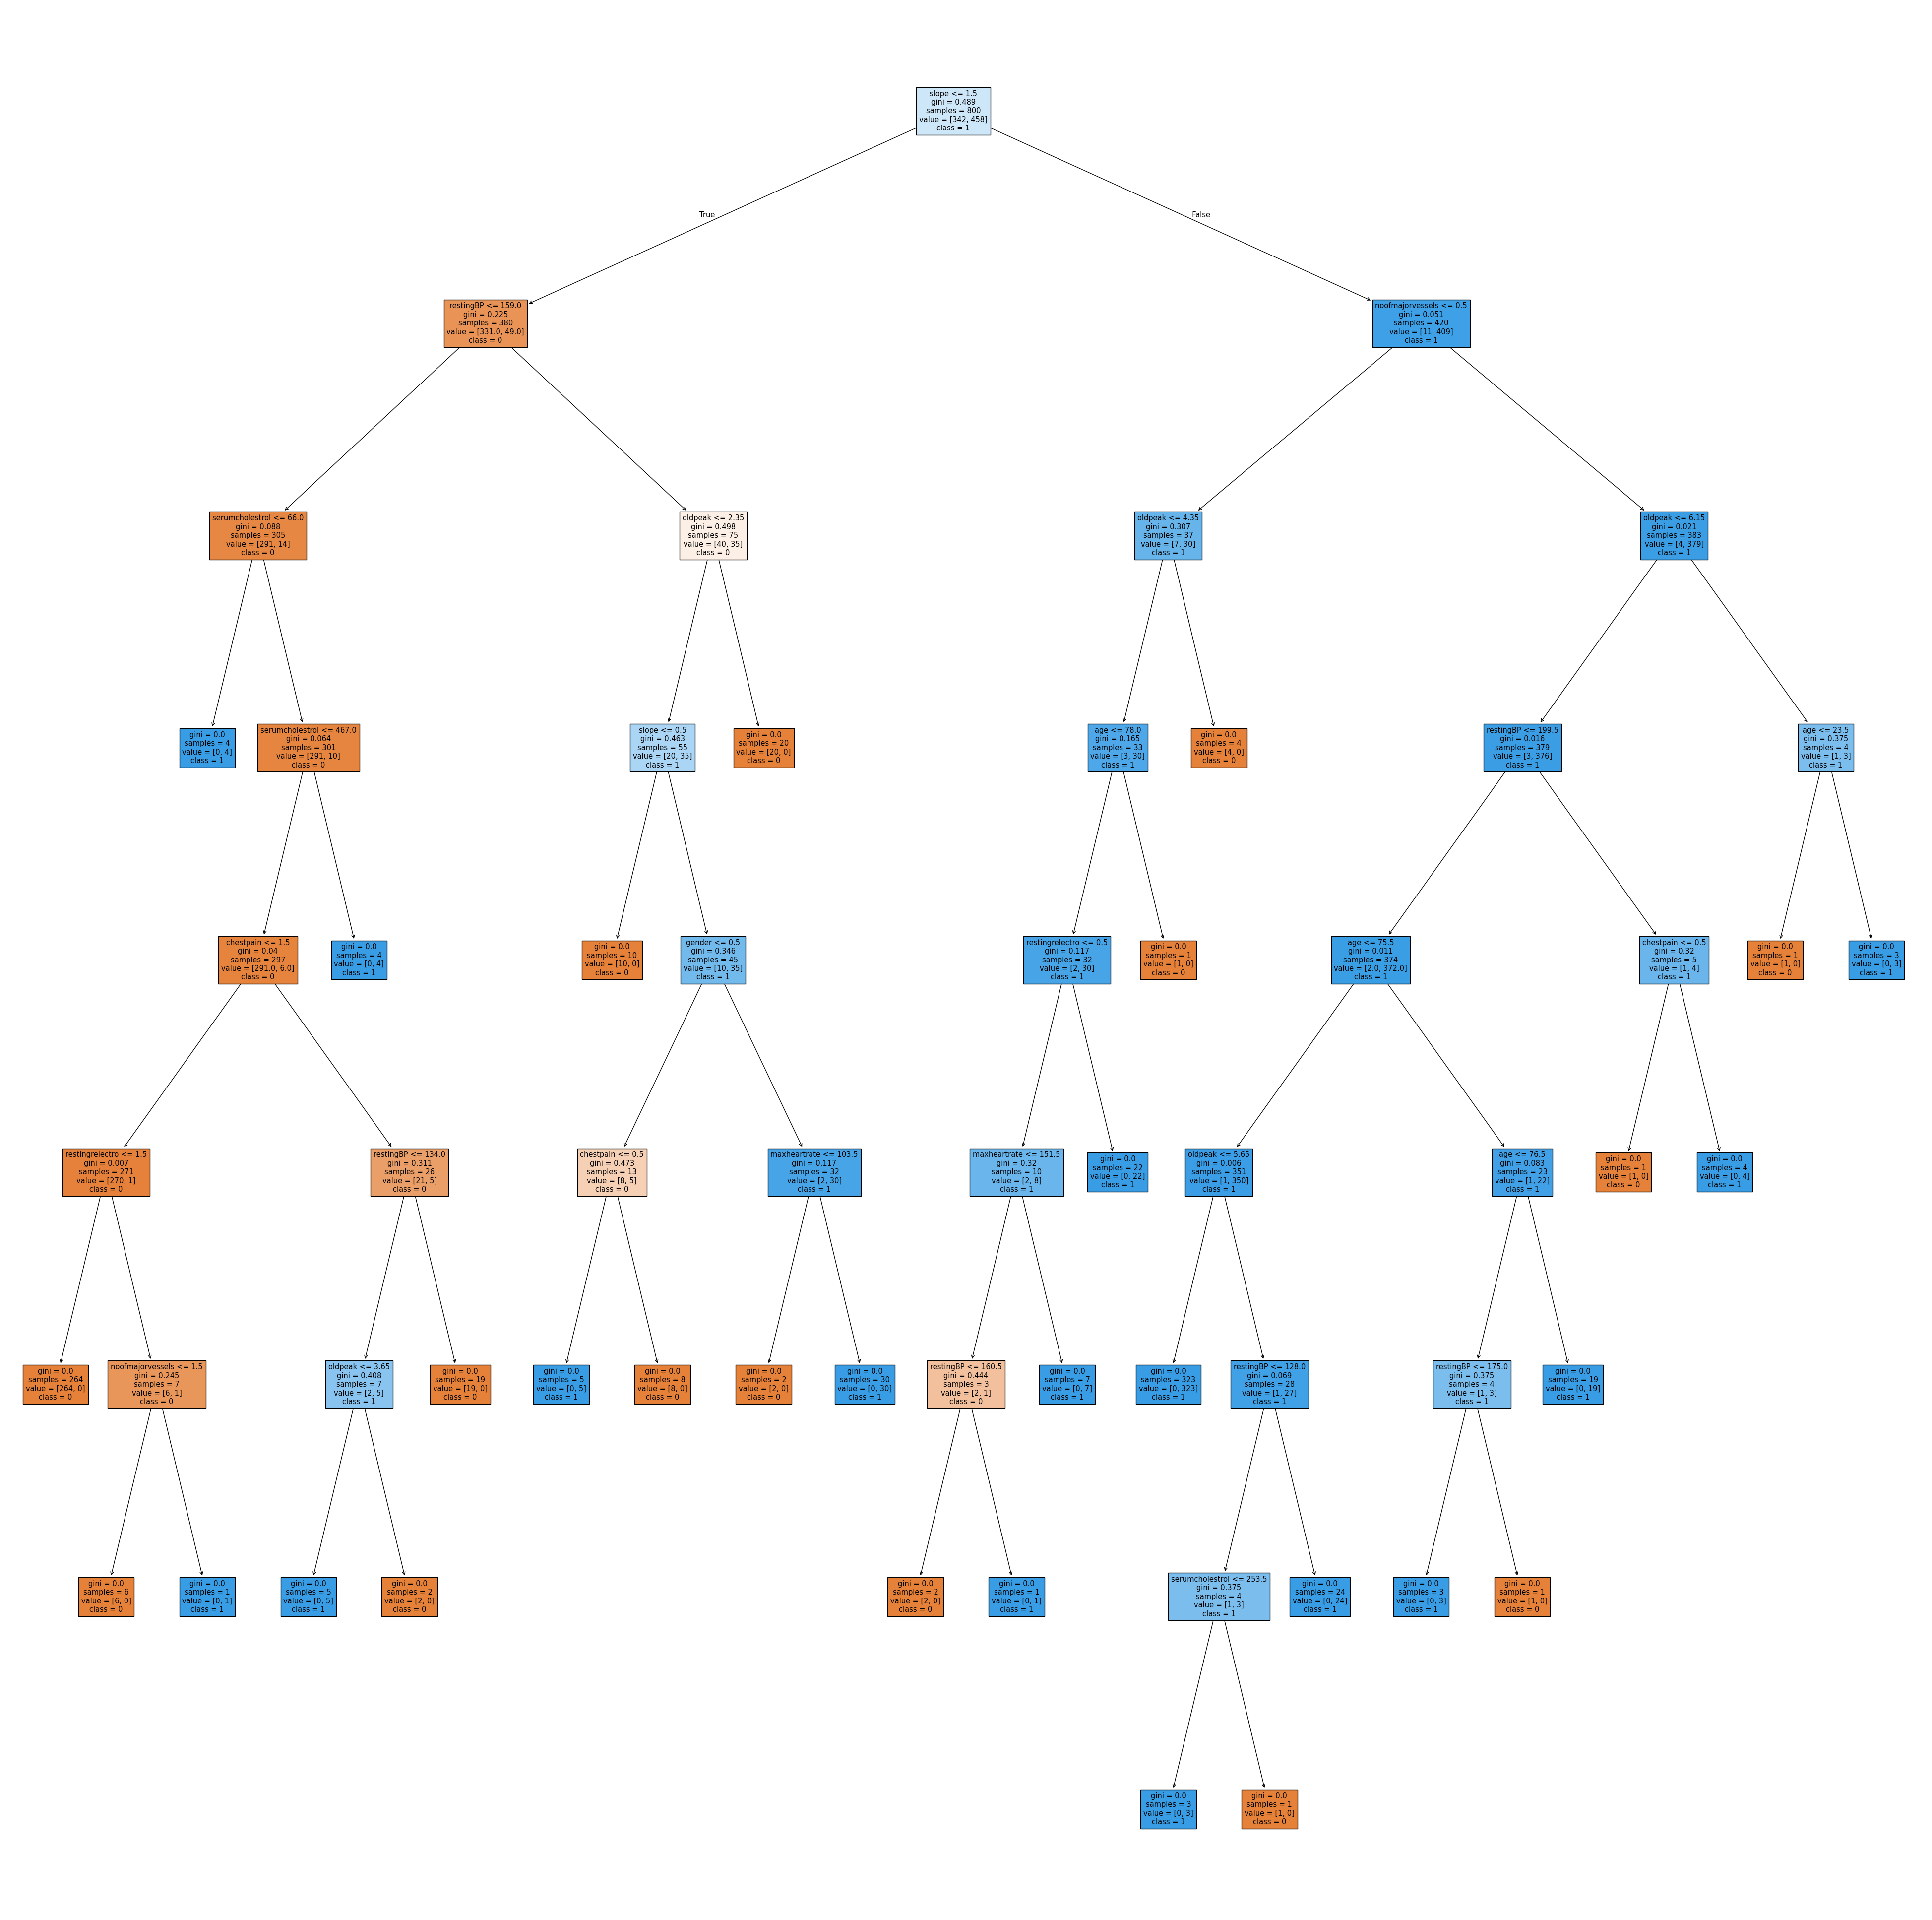

In [7]:
plt.figure(figsize=(50, 50))
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

##Tiempo de predicción

In [29]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print(f"Tiempo de predicción del Árbol de Decisiones: {prediction_time_dt:.6f} segundos")

Tiempo de predicción del Árbol de Decisiones: 0.006402 segundos


##Porcentaje de precisión

In [31]:
# Calcular la presición
precision = accuracy_score(Y_test, y_pred)*100

print(f"Precisión del Arbol de Desiciones: {precision}%")

Precisión del Arbol de Desiciones: 95.0%


##Matriz de confusión

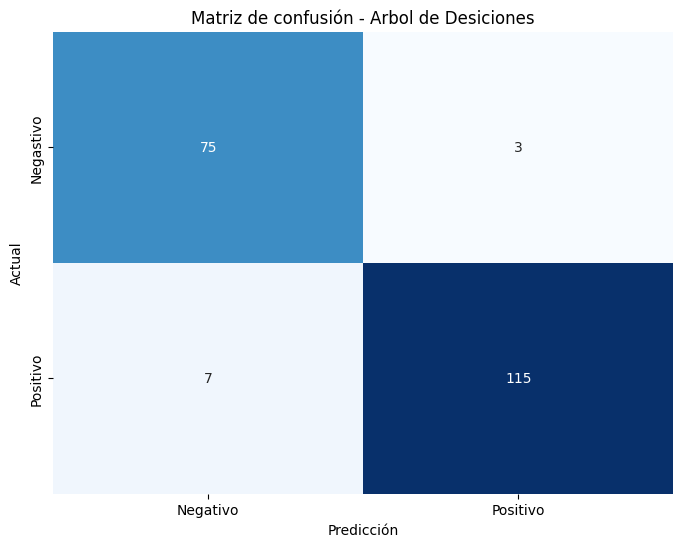

In [32]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negastivo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Arbol de Desiciones')
plt.show()

## Resultado de la predicción con el nuevo paciente

In [9]:
prediccion_usuario = modelo.predict(datos_usuario_master)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


# Naive Bayesian (Supervisado - Clasificación probabilistica)
Es un clasificador probabilístico basado en el teorema de Bayes con una suposición de independencia fuerte (naive) entre las características. A pesar de esta suposición simplista, a menudo funciona sorprendentemente bien en la práctica, especialmente para tareas de clasificación.

1. Teorema de Bayes: En su núcleo, el Naive Bayesian utiliza el teorema de Bayes para calcular la probabilidad de que una instancia (un conjunto de características) pertenezca a una clase específica. El teorema se expresa como:

   P(Clase | Características) = P(Características | Clase) * P(Clase) / P(Características)

    * P(Clase | Características): Es la probabilidad a posteriori, lo que queremos encontrar (la probabilidad de que una instancia pertenezca a una clase dadas sus características).
    * P(Características | Clase): Es la probabilidad de observar las características dadas que la instancia pertenece a una clase específica.
    * P(Clase): Es la probabilidad a priori de la clase (la frecuencia con la que aparece esa clase en los datos).
    * P(Características): Es la probabilidad a priori de las características (una constante para todas las clases, por lo que a menudo se ignora en la práctica de la clasificación, ya que solo necesitamos comparar las probabilidades relativas).

2. La suposición "Naive" (ingenua): La parte "ingenua" del algoritmo es la suposición de que todas las características son independientes entre sí, dado que se conoce la clase. Esto significa que el valor de una característica no afecta el valor de ninguna otra característica. En la realidad, esta suposición rara vez es completamente cierta, pero simplifica enormemente los cálculos y, sorprendentemente, no afecta negativamente el rendimiento en muchos casos.

Gracias a esta suposición, P(Características | Clase) puede calcularse como el producto de las probabilidades de cada característica individualmente, dada la clase:

P(x1, x2, ..., xn | Clase) = P(x1 | Clase) * P(x2 | Clase) * ... * P(xn | Clase)

## Importación libreria

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

##Entrenamiento y tiempo de entrenamiento

In [33]:
modelo = MultinomialNB()
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.01218271255493164


##Tiempo de predicción

In [35]:
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print(f"Tiempo de predicción del Naive Bayesian: {prediction_time_dt:.6f} segundos")

Tiempo de predicción del Naive Bayesian: 0.003838 segundos


##Porcentaje de Precisión del modelo

In [37]:
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100

print(f"Precisión del modelo Naive Bayesian: {precision}%")

Precisión del modelo Naive Bayesian: 95.0%


##Visualización de la matriz de confusión

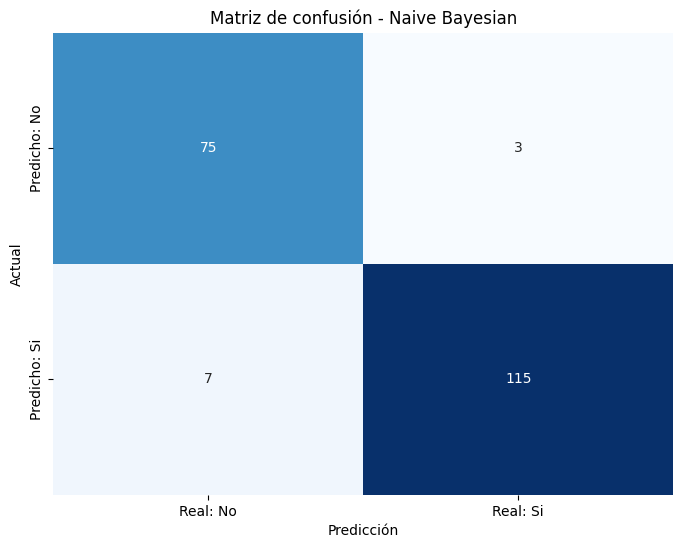

In [36]:
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Naive Bayesian')
plt.show()

##Precisión del modelo con MultinomialNB y GaussianNB

In [40]:
# Dataset base
X = df.drop(columns=["patientid", "target"])
Y = df["target"]

# Parámetros institucionales
umbral_precision = 90.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=semilla)

    modelo = MultinomialNB()
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla de partición encontrada (MultinomialNB): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")




No se superó el umbral de precisión (90%) en 1000 intentos.


In [42]:
# Dataset reducido
X_reduced = df[["slope", "chestpain", "restingBP", "restingrelectro", "noofmajorvessels"]]
y = df["target"]

# Parámetros institucionales
umbral_precision = 90.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    # División en train/test con semilla variable
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=semilla)

    modelo = GaussianNB()
    modelo.fit(Xr_train, yr_train)

    start_time = time.time()
    y_pred = modelo.predict(Xr_test)
    end_time = time.time()

    precision = accuracy_score(yr_test, y_pred) * 100  # convertir a porcentaje

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla de partición encontrada (GaussianNB): {semilla_final}")
    print(f"Precisión: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"No se alcanzó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos usando las 5 columnas.")


Semilla de partición encontrada (GaussianNB): 1
Precisión: 97.00%
Tiempo de predicción: 0.001785 segundos


In [51]:
#Paciente con GaussianNB

# Crear un DataFrame directamente de las columnas seleccionadas del DataFrame original del usuario
datos_usuario_gaus = datos_usuario_master[[
    'slope',
    'chestpain',
    'restingBP',
    'restingrelectro',
    'noofmajorvessels'
]]

prediccion = modelo_encontrado.predict(datos_usuario_gaus)

if prediccion[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


* El modelo MultinomialNB aplicado al dataset completo no logró superar el umbral de precisión del 90% establecido, indicando que, con todas las características y la suposición de distribución multinomial, no alcanzó el rendimiento deseado.
* En contraste, el modelo GaussianNB aplicado a un dataset reducido de solo 5 columnas (slope, chestpain, restingBP, restingrelectro, noofmajorvessels) sí fue capaz de superar el umbral de precisión del 90%, e incluso alcanzó un 97.00%.
<br>
<p>Esto sugiere que estas 5 características específicas son altamente relevantes y predictivas para el problema de clasificación, y que la suposición de una distribución gaussiana para estas características funciona muy bien en este contexto. Además, el GaussianNB en este caso fue mucho más eficiente en encontrar una configuración óptima que el MultinomialNB con el dataset completo.</p>

El objetivo final es encontrar el modelo que mejor prediga la enfermedad cardíaca. Al probar diferentes variantes de Naive Bayes (Multinomial vs. Gaussian) y diferentes conjuntos de características, estamos realizando una evaluación comparativa. Esto nos permite identificar cuál de estas configuraciones (combinación de modelo y características) ofrece la mayor precisión y eficiencia para nuestro problema específico. La alta precisión del GaussianNB con las 5 columnas resalta que, para este problema y características, esa combinación fue la más exitosa.

# Support Vector Machines

In [14]:
from sklearn.svm import SVC

modelo = SVC(kernel='linear', random_state=9)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")


Tiempo de entrenamiento: 7.971850633621216


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del SVM: 0.005098 segundos

---------------------------------------------------------------------------------------------------------



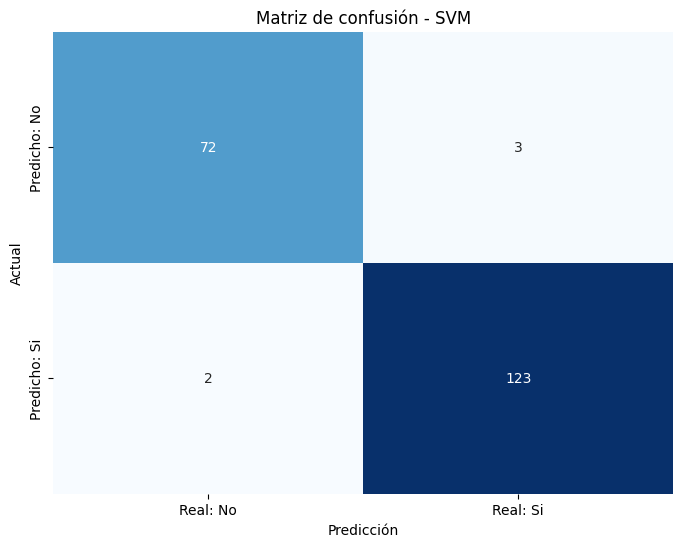

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo SVM: 97.5%

---------------------------------------------------------------------------------------------------------



In [15]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del SVM: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - SVM')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo SVM: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [16]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 73         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")


Posee altas probabilidades de tener inconvenientes en el corazon.


# K-Nearest Neighbor


In [17]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.011463403701782227


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del modelo KNN: 0.010602 segundos

---------------------------------------------------------------------------------------------------------



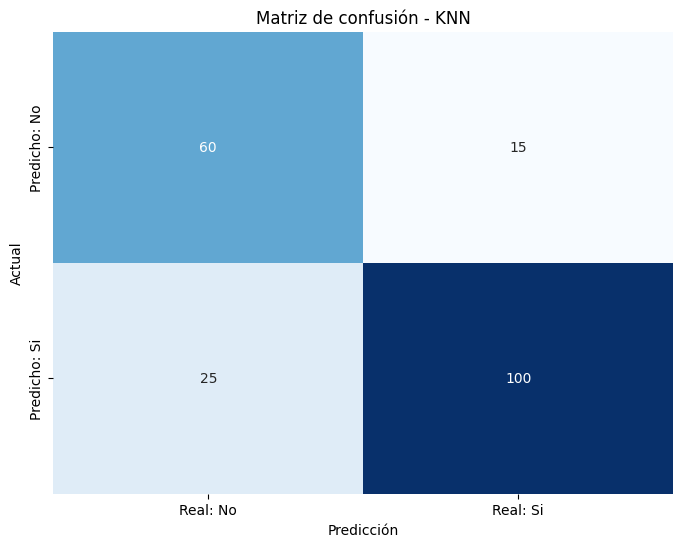

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo KNN: 80.0%

---------------------------------------------------------------------------------------------------------



In [18]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del modelo KNN: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - KNN')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo KNN: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [19]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 700      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


In [20]:
# Ingreso de datos del nuevo paciente (formulario)
chestpain = "3"  # @param ["0", "1", "2", "3"]
restingBP = 165   # @param {type:"number"}
restingrelectro = "2"  # @param ["0", "1", "2"]
slope = "2"  # @param ["0", "1", "2", "3"]
noofmajorvessels = "0"  # @param ["0", "1", "2", "3"]

# 🔧 Conversión de strings a enteros
chestpain = int(chestpain)
restingrelectro = int(restingrelectro)
slope = int(slope)
noofmajorvessels = int(noofmajorvessels)
restingBP = float(restingBP)  # por si querés precisión decimal


nuevo_paciente = {
    "chestpain": chestpain,
    "restingBP": restingBP,
    "slope": slope,
    "restingrelectro": restingrelectro,
    "noofmajorvessels": noofmajorvessels
}


In [21]:
# Dataset reducido
X_reduced = df[["slope", "chestpain", "restingBP", "restingrelectro", "noofmajorvessels"]]
y = df["target"]

# Parámetros institucionales
umbral_precision = 95.0  # en porcentaje
max_intentos = 1000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):
    # División en train/test con semilla variable
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=semilla)

    modelo = KNeighborsClassifier()
    modelo.fit(Xr_train, yr_train)

    start_time = time.time()
    y_pred = modelo.predict(Xr_test)
    end_time = time.time()

    precision = accuracy_score(yr_test, y_pred) * 100  # convertir a porcentaje

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla encontrada (KNN, 5 columnas): {semilla_final}")
    print(f"Precisión: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"No se alcanzó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos usando las 5 columnas.")


Semilla encontrada (KNN, 5 columnas): 6
Precisión: 96.50%
Tiempo de predicción: 0.004807 segundos


In [22]:
# Parámetros institucionales
umbral_precision = 82.0  # en porcentaje
max_vecinos = 15
modelo_encontrado = None
precision_final = 0
mejor_k = None
tiempo_prediccion = None

for k in range(1, max_vecinos + 1):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100

    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        mejor_k = k
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Vecinos óptimos encontrados (KNN): {mejor_k}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")
else:
    print(f"No se superó el umbral de precisión ({umbral_precision:.0f}%) con hasta {max_vecinos} vecinos.")





Vecinos óptimos encontrados (KNN): 13
Precisión alcanzada: 83.00%
Tiempo de predicción: 0.007902 segundos


# Perceptron


In [23]:
from sklearn.linear_model import Perceptron

X= df[['slope', 'chestpain', 'restingBP', 'restingrelectro', 'noofmajorvessels']]
Y= df["target"]

modelo = Perceptron(random_state=2748, max_iter=1000000)
i = time.time()
modelo.fit(X_train, Y_train)
f = time.time()
print(f"Tiempo de entrenamiento: {f-i}")

Tiempo de entrenamiento: 0.011959075927734375


------------------------------------------ Tiempo de prediccion -----------------------------------------

Tiempo de predicción del Perceptron: 0.002469 segundos

---------------------------------------------------------------------------------------------------------



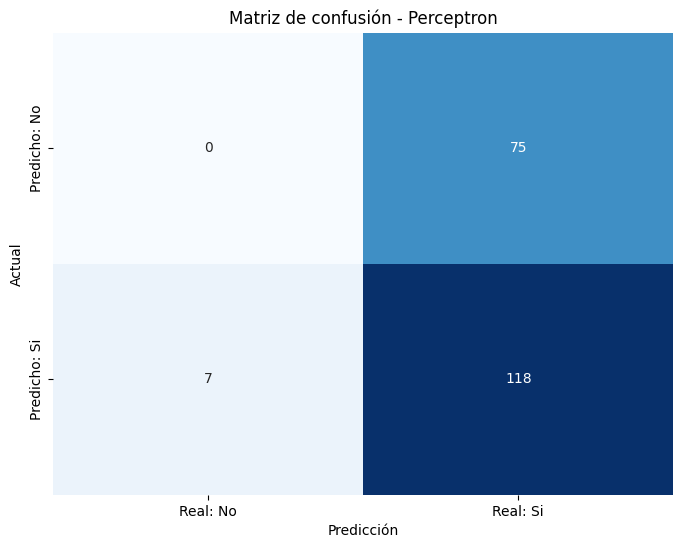

------------------------------------------ Precisión ----------------------------------------------------

Precisión del modelo Perceptron: 59.0%

---------------------------------------------------------------------------------------------------------



In [24]:
# Calcular el tiempo de predicción
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()

prediction_time_dt = end_time - start_time

print("------------------------------------------ Tiempo de prediccion -----------------------------------------")
print()
print(f"Tiempo de predicción del Perceptron: {prediction_time_dt:.6f} segundos")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real: No', 'Real: Si'],
            yticklabels=['Predicho: No', 'Predicho: Si'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Perceptron')
plt.show()

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular precisión
precision = accuracy_score(Y_test, y_pred)*100


print("------------------------------------------ Precisión ----------------------------------------------------")
print()
print(f"Precisión del modelo Perceptron: {precision}%")
print()
print("---------------------------------------------------------------------------------------------------------")
print()

In [25]:
#Formulario

Edad = 21    # @param {type:"slider", min:18, max:90, step:1}
Genero = "Femenino"       # @param ["Masculino", "Femenino"]
DolorPecho = "1"       # @param ["0", "1", "2", "3"]
PresionArterial = 147         # @param {type:"slider", min:50, max:250, step:1}
Clesterol = 379      # @param {type:"slider", min:0, max:700, step:1}
Glucemia = "0"            # @param ["0", "1"]
Electrocardiograma = "3"           # @param ["0", "1", "2","3"]
FrecuenciaCardiacaMaxima = 146      # @param {type:"slider", min:60, max:250, step:1}
AnginaDePecho = "0"            # @param ["0", "1"]
Depresión = 2.4          # @param {type:"slider", min:0.1, max:7, step:0.1}
Pendiente = "2"         # @param ["0", "1", "2", "3"]
VasosCAfectados = "1"             # @param ["0", "1", "2", "3"]

if Genero == "Masculino":
  Genero = 1
else:
  Genero = 0

#Creamos un DF con los datos que ingresó el usuario
datos_usuario = pd.DataFrame({
    'age': [Edad],
    'gender': [Genero],
    'chestpain': [DolorPecho],
    'restingBP': [PresionArterial],
    'serumcholestrol': [Clesterol],
    'fastingbloodsugar': [Glucemia],
    'restingrelectro': [Electrocardiograma],
    'maxheartrate': [FrecuenciaCardiacaMaxima],
    'exerciseangia': [AnginaDePecho],
    'oldpeak': [Depresión],
    'slope': [Pendiente],
    'noofmajorvessels': [VasosCAfectados],
})

prediccion_usuario = modelo.predict(datos_usuario)

if prediccion_usuario[0] == 1:
    print("Posee altas probabilidades de tener inconvenientes en el corazon.")
else:
    print(f"Es probable que el usuario no tenga problemas cardíacos.")

Posee altas probabilidades de tener inconvenientes en el corazon.


Semilla encontrada (Perceptron): 64
Precisión alcanzada: 85.00%
Tiempo de predicción: 0.002207 segundos


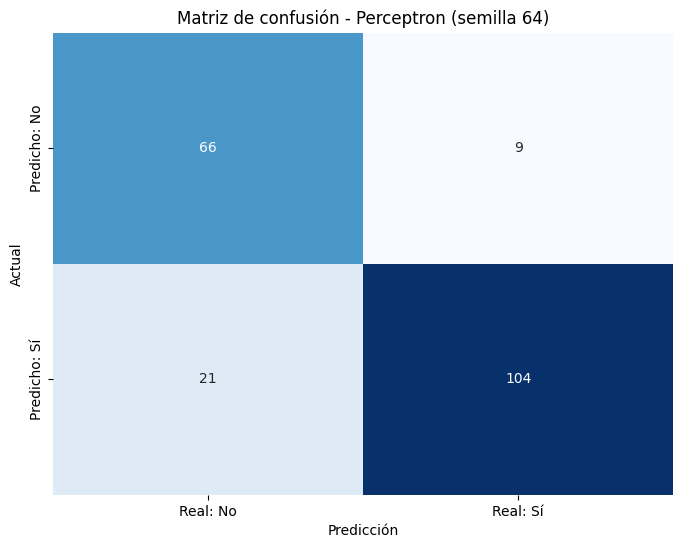

In [26]:
# Dataset completo (sin ID ni target)
X = df.drop(columns=["patientid", "target"])
Y = df["target"]

# Parámetros institucionales
umbral_precision = 80.0  # en porcentaje
max_intentos = 20000
modelo_encontrado = None
precision_final = 0
semilla_final = None
tiempo_prediccion = None

for semilla in range(1, max_intentos + 1):

    modelo = Perceptron(random_state=semilla, max_iter=100000)
    modelo.fit(X_train, Y_train)

    start_time = time.time()
    y_pred = modelo.predict(X_test)
    end_time = time.time()

    precision = accuracy_score(Y_test, y_pred) * 100
    if precision > umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        tiempo_prediccion = end_time - start_time
        break

# Resultado institucional
if modelo_encontrado:
    print(f"Semilla encontrada (Perceptron): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
    print(f"Tiempo de predicción: {tiempo_prediccion:.6f} segundos")

    # Matriz de confusión
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Real: No', 'Real: Sí'],
                yticklabels=['Predicho: No', 'Predicho: Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Matriz de confusión - Perceptron (semilla {semilla_final})')
    plt.show()
else:
    print(f"⚠️ No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")




In [27]:
# Parámetros
umbral_precision = 80.0
max_intentos = 20000
modelo_encontrado = None
precision_final = 0
semilla_final = None

X= df[['slope', 'chestpain', 'restingBP', 'restingrelectro', 'noofmajorvessels']]
Y= df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

for semilla in range(1, max_intentos, + 1):

    modelo = Perceptron(random_state=semilla, max_iter=100000)
    modelo.fit(X_train, Y_train)
    y_pred = modelo.predict(X_test)
    precision = accuracy_score(Y_test, y_pred) * 100
    if precision >= umbral_precision:
        modelo_encontrado = modelo
        precision_final = precision
        semilla_final = semilla
        break

if modelo_encontrado:
    print(f"Semilla encontrada (Perceptron): {semilla_final}")
    print(f"Precisión alcanzada: {precision_final:.2f}%")
else:
    print(f"No se superó el umbral de precisión ({umbral_precision:.0f}%) en {max_intentos} intentos.")


Semilla encontrada (Perceptron): 1
Precisión alcanzada: 87.50%
